In [1]:
import pandas as pd 
import math 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('forest_fires.csv')

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


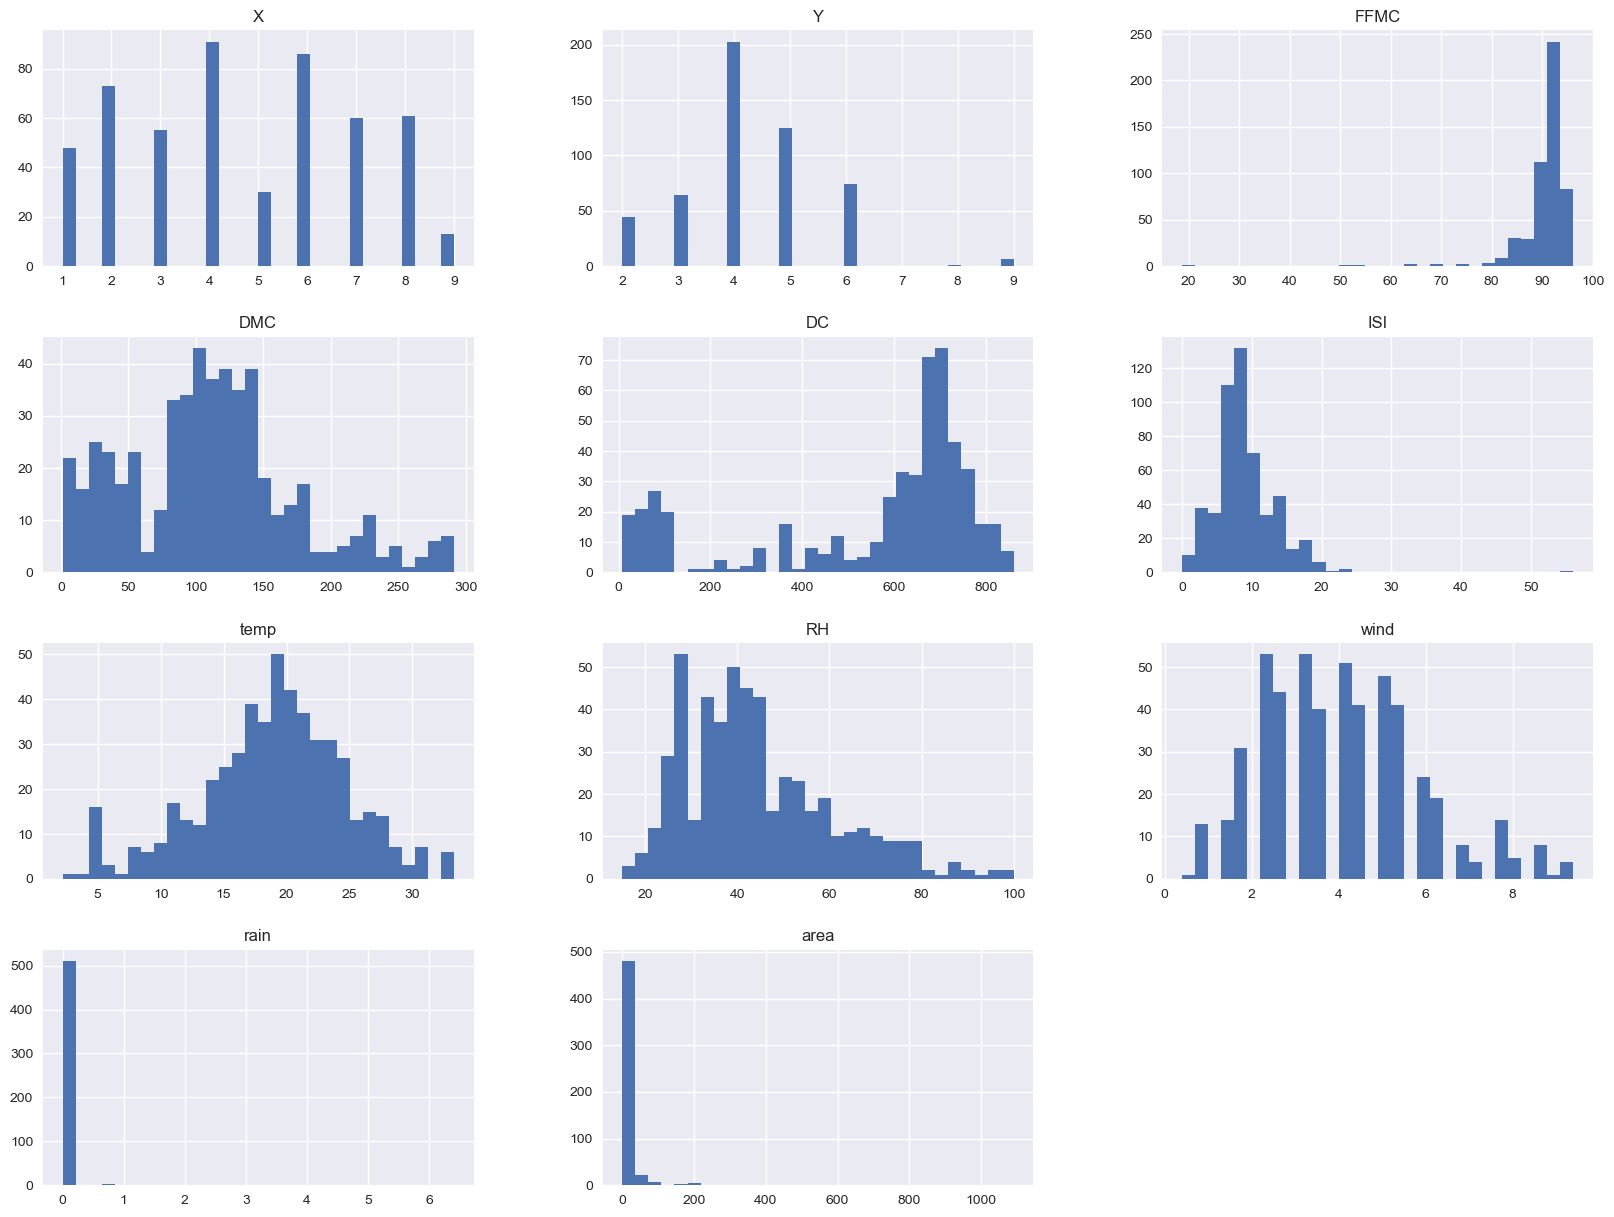

In [5]:
plt.style.use('seaborn-v0_8')
df.hist(bins=30,figsize=(20,15)) #plotting the histogram
plt.show()

In [6]:
#Converting the days and months into integers

df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                 (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)

C:\Users\sushi\AppData\Local\Temp\ipykernel_20192\1810805419.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
C:\Users\sushi\AppData\Local\Temp\ipykernel_20192\1810805419.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

In [7]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [8]:
df.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
month,517.0,7.475822,2.275990,1.0,7.0,8.00,9.00,12.00
day,517.0,4.259188,2.072929,1.0,2.0,5.00,6.00,7.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00


In [11]:
from sklearn.model_selection import train_test_split
# dividing the data into test and training sets
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
work_set = train_set.copy() # assigning a copy of train set to work_set

In [12]:
train_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
329,4,3,9,6,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,3.33
173,4,4,9,1,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0,3.07
272,2,5,8,2,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0,3.09
497,3,4,8,2,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
182,5,4,2,7,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38


In [13]:
test_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
304,6,5,5,6,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00
501,7,5,8,2,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
441,8,6,8,1,92.1,207.0,672.6,8.2,25.5,29,1.8,0.0,1.23
153,5,4,9,5,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,1.46
503,2,4,8,3,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0,1.95


<Figure size 800x600 with 0 Axes>

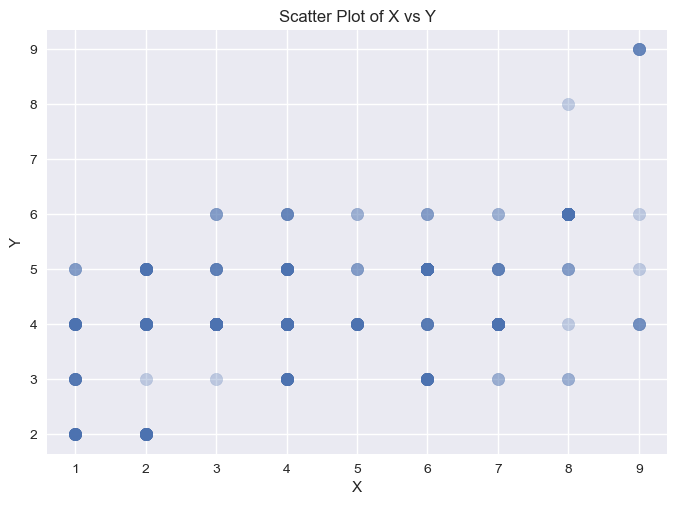

In [20]:
plt.figure(figsize=(8, 6))
work_set.plot(kind='scatter',x='X',y='Y',alpha=0.3,s=80)
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [21]:
# Extracting featuresfrom the dataset

# converting to list
x_values = list(work_set['X'])
y_values = list(work_set['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []
    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

In [22]:
# counting the instances location in the dataset

def count_points(x_points, y_points, scaling_factor):
    count_array = []
    
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )

    return count_array

In [23]:
work_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
329,4,3,9,6,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,3.33
173,4,4,9,1,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0,3.07
272,2,5,8,2,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0,3.09
497,3,4,8,2,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
182,5,4,2,7,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38


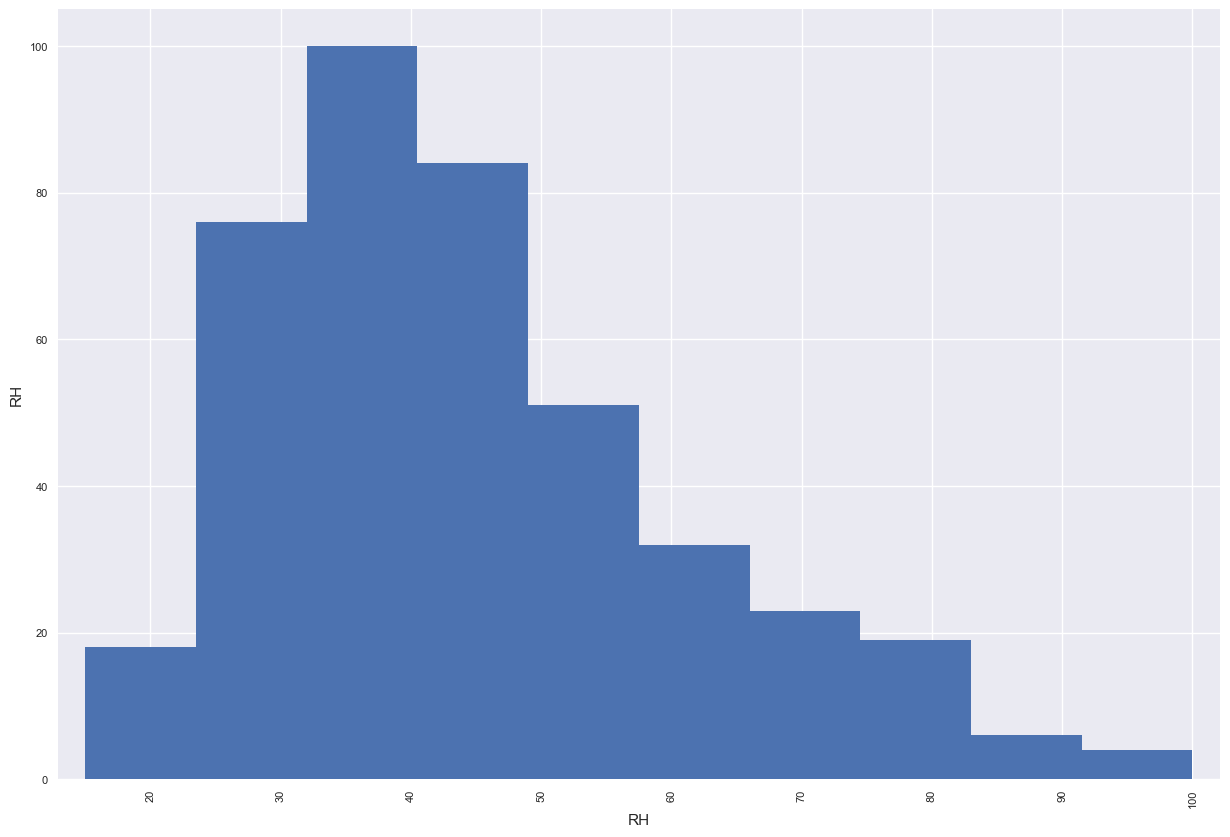

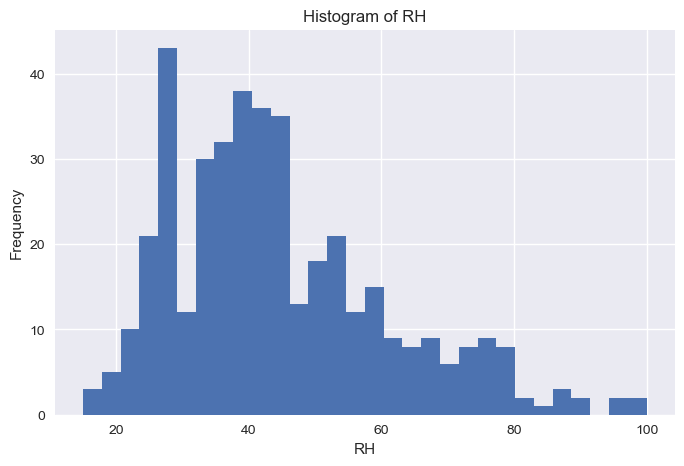

In [25]:
# Plotting the histogram for the RH attribute
plt.figure(figsize=(8, 5))
work_set['RH'].hist(bins=30)
plt.title('Histogram of RH')
plt.xlabel('RH')
plt.ylabel('Frequency')
plt.show()

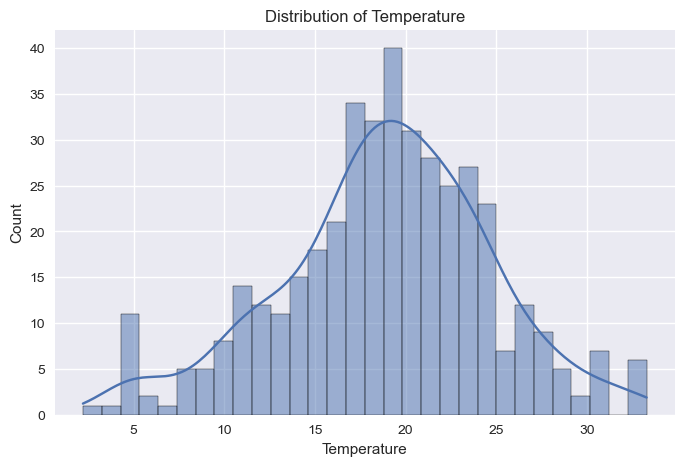

In [26]:
# Plotting the histogram for the temp attribute
plt.figure(figsize=(8, 5))
sns.histplot(work_set['temp'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

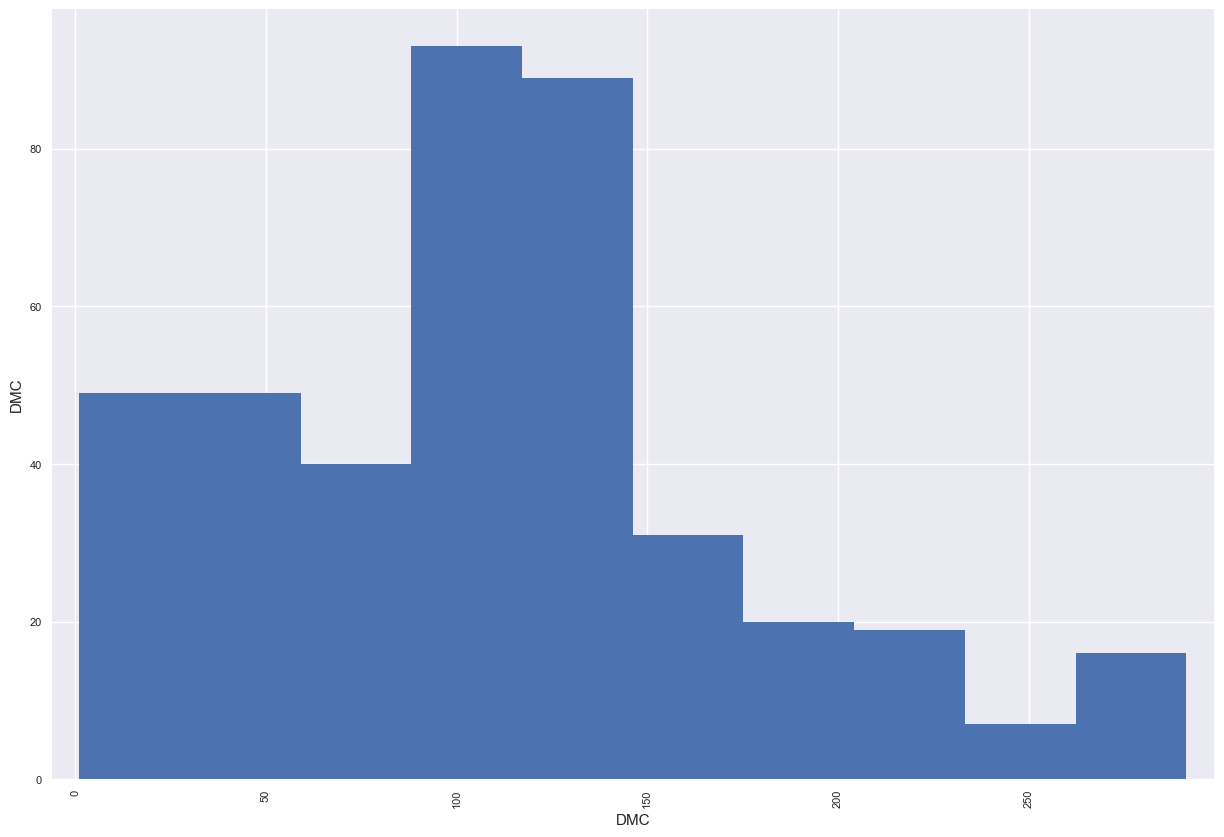

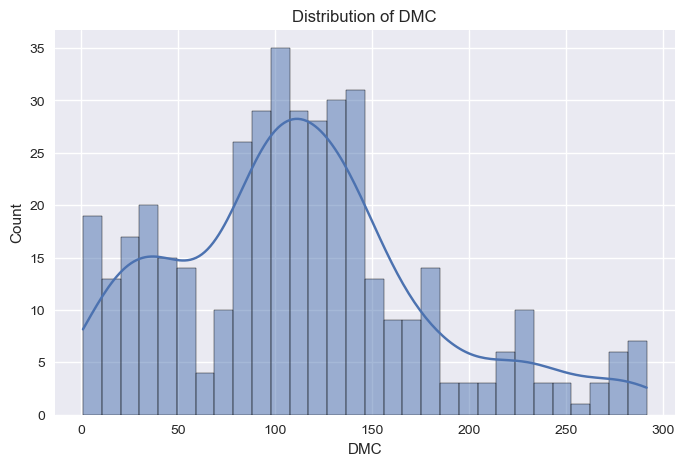

In [28]:
# Plotting the histogram for the DMC attribute
plt.figure(figsize=(8, 5))
sns.histplot(work_set['DMC'], bins=30, kde=True)

plt.title('Distribution of DMC')
plt.xlabel('DMC')
plt.ylabel('Count')
plt.show()

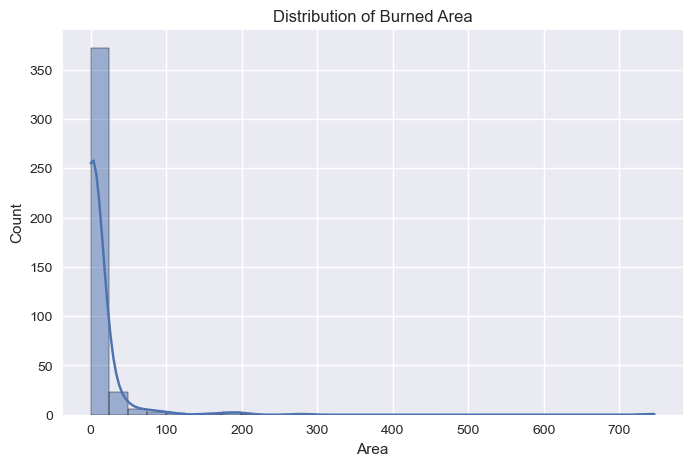

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(work_set['area'], bins=30, kde=True)

plt.title('Distribution of Burned Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()